Data Science CoderHouse [61750]

Oviedo Nelso primer pre entrega


## Fuente
Los datos utilizados en este trabajo fueron obtenidos de Kaggle y se encuentran disponibles en el siguiente enlace:
https://www.kaggle.com/datasets/purumalgi/music-genre-classification/data?select=train.csv


## Importacion librerias

In [22]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

## Importacion Base de datos

In [27]:
train_url = 'https://github.com/Nelsonaos/Oviedo_Nelso_EntregaFinal/blob/main/train.csv?raw=true'
submission_url = 'https://github.com/Nelsonaos/Oviedo_Nelso_EntregaFinal/blob/main/submission.csv?raw=true'

df = pd.read_csv(train_url)

print(df.head())


             Artist Name                             Track Name  Popularity  \
0             Bruno Mars  That's What I Like (feat. Gucci Mane)        60.0   
1                 Boston                           Hitch a Ride        54.0   
2          The Raincoats                     No Side to Fall In        35.0   
3                   Deno             Lingo (feat. J.I & Chunkz)        66.0   
4  Red Hot Chili Peppers      Nobody Weird Like Me - Remastered        53.0   

   danceability  energy   key  loudness  mode  speechiness  acousticness  \
0         0.854   0.564   1.0    -4.964     1       0.0485      0.017100   
1         0.382   0.814   3.0    -7.230     1       0.0406      0.001100   
2         0.434   0.614   6.0    -8.334     1       0.0525      0.486000   
3         0.853   0.597  10.0    -6.528     0       0.0555      0.021200   
4         0.167   0.975   2.0    -4.279     1       0.2160      0.000169   

   instrumentalness  liveness  valence    tempo  duration_in min/ms 

In [26]:
df.shape

(17996, 17)

In [4]:
df.columns

Index(['Artist Name', 'Track Name', 'Popularity', 'danceability', 'energy',
       'key', 'loudness', 'mode', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo',
       'duration_in min/ms', 'time_signature', 'Class'],
      dtype='object')

DICCIONARIO DE VARIABLES

Popularity: Mide la popularidad de una canción

Danceability: Indica qué tan adecuada es una canción para bailar(basada en la combinación de tempo, ritmo, estabilidad y fuerza de la canción)

Energy: Refleja la intensidad y actividad de la canción.

Key: La tonalidad musical de la canción, especifica la "nota raíz" y la escala que se utiliza en la composición.

Loudness: Refleja el volumen promedio de la canción en decibelios (dB).

Mode: Es un indicador de si la canción está en una tonalidad mayor o menor.

Speechiness: Mide cuán hablada es la canción en comparación con cantada.

Acousticness: Mide la probabilidad de que una canción sea acústica.

Instrumentalness: Mide la cantidad de música instrumental en la canción.

Liveness: Mide la probabilidad de que la canción sea una grabación en vivo.

Valence: Refleja el tipo de emoción que transmite la canción.

Tempo: Se refiere a la velocidad de la canción, medida en pulsos por minuto (BPM).

Duration_in min/ms: La duración de la canción en minutos y milisegundos.
Time_signature: La firma de tiempo de la canción, que indica cómo se agrupan los tiempos en una medida musical.

Class: grupo o categoría de canciones

In [71]:
df.info()
df.values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17996 entries, 0 to 17995
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Artist Name         17996 non-null  object 
 1   Track Name          17996 non-null  object 
 2   Popularity          17568 non-null  float64
 3   danceability        17996 non-null  float64
 4   energy              17996 non-null  float64
 5   key                 15982 non-null  float64
 6   loudness            17996 non-null  float64
 7   mode                17996 non-null  int64  
 8   speechiness         17996 non-null  float64
 9   acousticness        17996 non-null  float64
 10  instrumentalness    13619 non-null  float64
 11  liveness            17996 non-null  float64
 12  valence             17996 non-null  float64
 13  tempo               17996 non-null  float64
 14  duration_in min/ms  17996 non-null  float64
 15  time_signature      17996 non-null  int64  
 16  Clas

array([['Bruno Mars', "That's What I Like (feat. Gucci Mane)", 60.0, ...,
        234596.0, 4, 5],
       ['Boston', 'Hitch a Ride', 54.0, ..., 251733.0, 4, 10],
       ['The Raincoats', 'No Side to Fall In', 35.0, ..., 109667.0, 4, 6],
       ...,
       ['Smash Hit Combo', 'Peine perdue', 34.0, ..., 216222.0, 4, 8],
       ['Beherit', "Salomon's Gate", 29.0, ..., 219693.0, 4, 8],
       ['The Raconteurs', 'Broken Boy Soldier', 43.0, ..., 182227.0, 4,
        10]], dtype=object)

In [49]:
df.describe()

,Popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_in min/ms,time_signature
count,17568.000000,17996.000000,17996.000000,15982.000000,17996.000000,17996.000000,17996.000000,17996.000000,13619.000000,17996.000000,17996.000000,17996.000000,1.799600e+04,17996.000000
mean,44.512124,0.543433,0.662777,5.952447,-7.910660,0.636753,0.079707,0.247082,0.177562,0.196170,0.486208,122.623294,2.007445e+05,3.924039
std,17.426928,0.166268,0.235373,3.196854,4.049151,0.480949,0.083576,0.310632,0.304048,0.159212,0.240195,29.571527,1.119891e+05,0.361618
min,1.000000,0.059600,0.000020,1.000000,-39.952000,0.000000,0.022500,0.000000,0.000001,0.011900,0.018300,30.557000,5.016500e-01,1.000000
25%,33.000000,0.432000,0.509000,3.000000,-9.538000,0.000000,0.034800,0.004300,0.000089,0.097500,0.297000,99.620750,1.663370e+05,4.000000
50%,44.000000,0.545000,0.700000,6.000000,-7.016000,1.000000,0.047400,0.081400,0.003910,0.129000,0.481000,120.065500,2.091600e+05,4.000000
75%,56.000000,0.659000,0.860000,9.000000,-5.189000,1.000000,0.083000,0.434000,0.200000,0.258000,0.672000,141.969250,2.524900e+05,4.000000
max,100.000000,0.989000,1.000000,11.000000,1.355000,1.000000,0.955000,0.996000,0.996000,1.000000,0.986000,217.416000,1.477187e+06,5.000000


In [48]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Popularity,17568.0,44.512124,17.426928,1.000000,33.000000,44.00000,56.00000,100.000
danceability,17996.0,0.543433,0.166268,0.059600,0.432000,0.54500,0.65900,0.989
energy,17996.0,0.662777,0.235373,0.000020,0.509000,0.70000,0.86000,1.000
key,15982.0,5.952447,3.196854,1.000000,3.000000,6.00000,9.00000,11.000
loudness,17996.0,-7.910660,4.049151,-39.952000,-9.538000,-7.01600,-5.18900,1.355
mode,17996.0,0.636753,0.480949,0.000000,0.000000,1.00000,1.00000,1.000
speechiness,17996.0,0.079707,0.083576,0.022500,0.034800,0.04740,0.08300,0.955
acousticness,17996.0,0.247082,0.310632,0.000000,0.004300,0.08140,0.43400,0.996
instrumentalness,13619.0,0.177562,0.304048,0.000001,0.000089,0.00391,0.20000,0.996
liveness,17996.0,0.196170,0.159212,0.011900,0.097500,0.12900,0.25800,1.000


In [8]:

print(df.columns.tolist())

['Artist Name', 'Track Name', 'Popularity', 'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_in min/ms', 'time_signature', 'Class']


In [72]:
df.tail()

,Artist Name,Track Name,Popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_in min/ms,time_signature,Class
17991,Green-House,Find Home,35.0,0.166,0.109,7.0,-17.100,0,0.0413,0.99300,0.824000,0.0984,0.177,171.587,193450.0,3,6
17992,Micatone,All Gone,27.0,0.638,0.223,11.0,-10.174,0,0.0329,0.85800,0.000016,0.0705,0.335,73.016,257067.0,4,2
17993,Smash Hit Combo,Peine perdue,34.0,0.558,0.981,4.0,-4.683,0,0.0712,0.00003,0.000136,0.6660,0.262,105.000,216222.0,4,8
17994,Beherit,Salomon's Gate,29.0,0.215,0.805,6.0,-12.757,0,0.1340,0.00129,0.916000,0.2560,0.355,131.363,219693.0,4,8
17995,The Raconteurs,Broken Boy Soldier,43.0,0.400,0.853,4.0,-5.320,0,0.0591,0.00604,0.212000,0.3340,0.377,138.102,182227.0,4,10


In [51]:
print(df.iloc[:,:])

                 Artist Name                             Track Name  \
0                 Bruno Mars  That's What I Like (feat. Gucci Mane)   
1                     Boston                           Hitch a Ride   
2              The Raincoats                     No Side to Fall In   
3                       Deno             Lingo (feat. J.I & Chunkz)   
4      Red Hot Chili Peppers      Nobody Weird Like Me - Remastered   
...                      ...                                    ...   
17991            Green-House                              Find Home   
17992               Micatone                               All Gone   
17993        Smash Hit Combo                           Peine perdue   
17994                Beherit                         Salomon's Gate   
17995         The Raconteurs                     Broken Boy Soldier   

       Popularity  danceability  energy   key  loudness  mode  speechiness  \
0            60.0         0.854   0.564   1.0    -4.964     1       0

In [9]:
df.isnull().sum()

,0
Artist Name,0
Track Name,0
Popularity,428
danceability,0
energy,0
key,2014
loudness,0
mode,0
speechiness,0
acousticness,0


In [3]:
Nulos = df.isnull().sum()
ColumnaNulos = Nulos[Nulos > 0]
print("Columnas con valores nulos")
print(ColumnaNulos)

Columnas con valores nulos
Popularity           428
key                 2014
instrumentalness    4377
dtype: int64


In [4]:
PorcentajeN = (ColumnaNulos / len(df)) * 100
print("Porcentaje de valores nulos por columna")
print(PorcentajeN)
#Esto se realiza con el fin de ver el porcentaje y calcular que es lo mas conveniente#

Porcentaje de valores nulos por columna
Popularity           2.378306
key                 11.191376
instrumentalness    24.322072
dtype: float64


In [ ]:
df.duplicated('Track Name').sum()

2867

###En este punto se hace una copia de l base para poder experimentar sin romper accidentalmente el dataset, por lo cual ya con en analisis previo, pasamos a realizar copia y reemplazar valores. Nos llevaremos 2 copas la Df_1 es la que trabajamos y la df_1C. La tenemos para usar los valores de lectura. Utilizamos dos cipas que ya al reemplazar los valores pasariamos de tener en una fila de numeros a string imposiblitando la lectura de los datos en el modelo

In [28]:
df_1 = df.copy()
df_1C= df.copy()

###Reemplazo de valores nulos

<ipython-input-29-7d09995e8b3a>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=Nulos_df, x='Cantidad de Valores Nulos', y='Variable', palette='viridis')


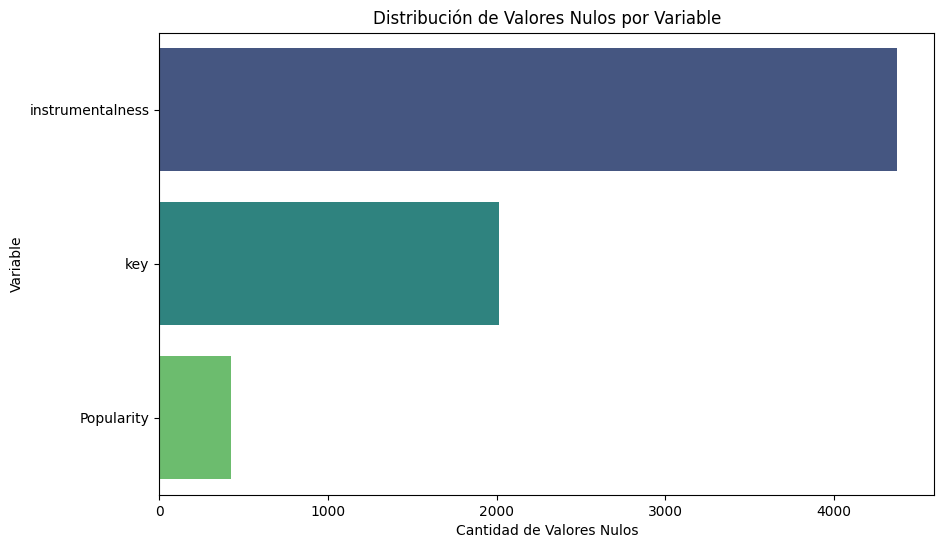

In [29]:
Nulos_df =Nulos[Nulos > 0].sort_values(ascending=False).reset_index()
Nulos_df.columns = ['Variable', 'Cantidad de Valores Nulos']

# Visualizar valores nulos
plt.figure(figsize=(10, 6))
sns.barplot(data=Nulos_df, x='Cantidad de Valores Nulos', y='Variable', palette='viridis')
plt.title("Distribución de Valores Nulos por Variable")
plt.xlabel("Cantidad de Valores Nulos")
plt.ylabel("Variable")
plt.show()

### En el siguiente paso reemplzamos nulos Popularity e instrumentalness con la mediana y Key con la moda

In [30]:
df_1C['Popularity'].fillna(df_1C['Popularity'].median(), inplace=True)
df_1C['key'].fillna(df_1C['key'].mode()[0], inplace=True)
df_1C['instrumentalness'].fillna(df_1C['instrumentalness'].median(), inplace=True)

<ipython-input-30-4704236ea4c5>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_1C['Popularity'].fillna(df_1C['Popularity'].median(), inplace=True)
<ipython-input-30-4704236ea4c5>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, in

In [31]:
df_1['Popularity'].fillna(df_1['Popularity'].median(), inplace=True)
df_1['key'].fillna(df_1['key'].mode()[0], inplace=True)
df_1['instrumentalness'].fillna(df_1['instrumentalness'].median(), inplace=True)

<ipython-input-31-1fb3e87c262d>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_1['Popularity'].fillna(df_1['Popularity'].median(), inplace=True)
<ipython-input-31-1fb3e87c262d>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inpl

In [32]:
print(df_1.isnull().sum())

Artist Name           0
Track Name            0
Popularity            0
danceability          0
energy                0
key                   0
loudness              0
mode                  0
speechiness           0
acousticness          0
instrumentalness      0
liveness              0
valence               0
tempo                 0
duration_in min/ms    0
time_signature        0
Class                 0
dtype: int64


## Graficacion

In [33]:
print(df_1['Class'].value_counts())
print(df_1['energy'].value_counts())
print(df_1['danceability'].value_counts())

Class
10    4949
6     2587
9     2524
8     1854
5     1447
1     1373
2     1272
0      625
7      576
3      402
4      387
Name: count, dtype: int64
energy
0.8720    55
0.9320    55
0.9480    54
0.9310    51
0.9140    50
          ..
0.0669     1
0.0842     1
0.0123     1
0.0371     1
0.0835     1
Name: count, Length: 1208, dtype: int64
danceability
0.5270    63
0.5290    62
0.5330    59
0.5520    59
0.6010    56
          ..
0.9740     1
0.0726     1
0.1460     1
0.0998     1
0.9480     1
Name: count, Length: 909, dtype: int64


###Grafico Dispersion

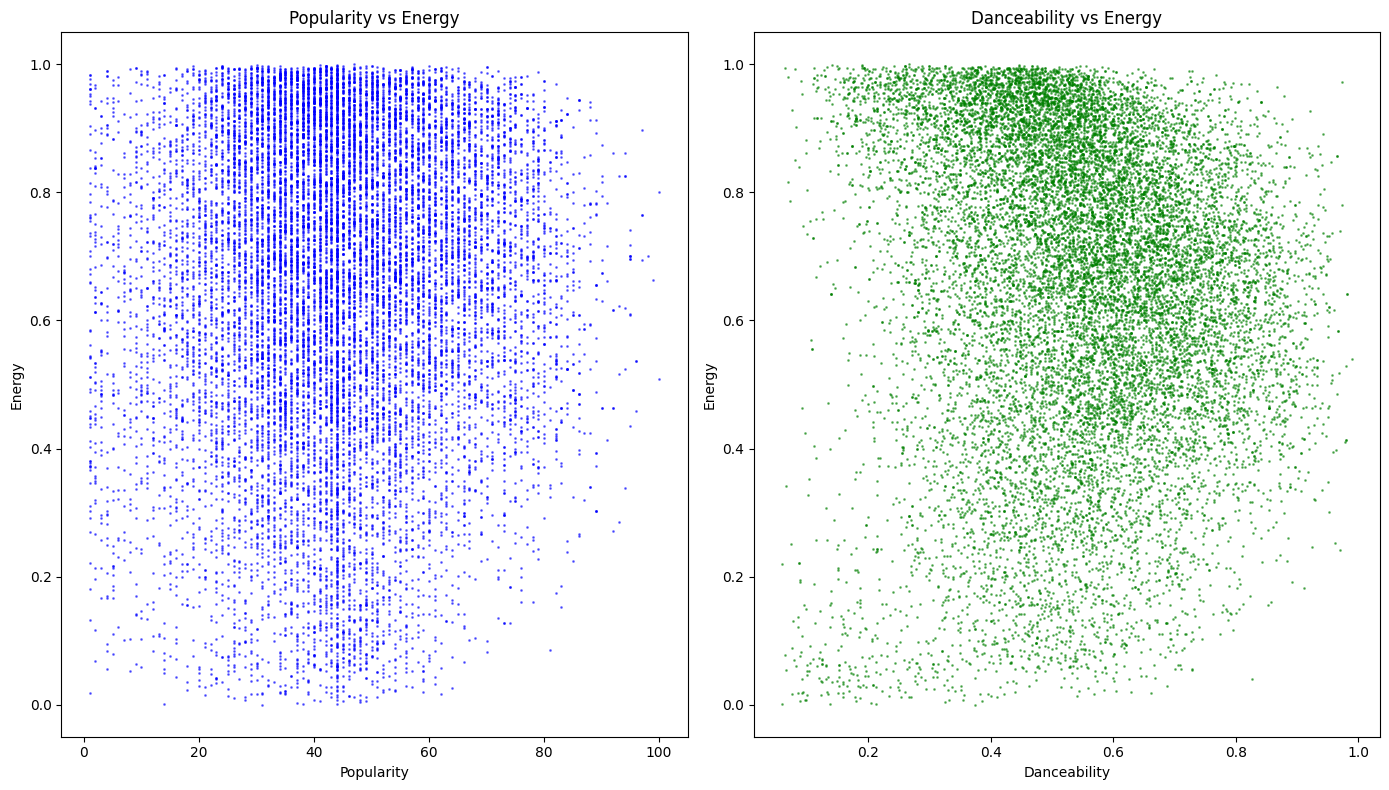

In [11]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(14, 8))

ax1.scatter(df_1['Popularity'], df_1['energy'], s=1, color='blue', alpha=0.5)
ax1.set_title('Popularity vs Energy')
ax1.set_xlabel('Popularity')
ax1.set_ylabel('Energy')

ax2.scatter(df_1['danceability'], df_1['energy'], s=1, color='green', alpha=0.5)
ax2.set_title('Danceability vs Energy')
ax2.set_xlabel('Danceability')
ax2.set_ylabel('Energy')

plt.tight_layout()
plt.show()

Generamo un primer gratfico para ver nuestras hipotesis a primera vista no muestra nada relevanteSe probo con otras medidas alpha=

In [12]:
# Selecion de solo xolumnas numericas tipo float, esto con el fin de poder graficar#
df_float = df_1.select_dtypes(include=['float64'])
df_float

,Popularity,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_in min/ms
0,60.0,0.854,0.564,1.0,-4.964,0.0485,0.017100,0.003910,0.0849,0.8990,134.071,234596.0
1,54.0,0.382,0.814,3.0,-7.230,0.0406,0.001100,0.004010,0.1010,0.5690,116.454,251733.0
2,35.0,0.434,0.614,6.0,-8.334,0.0525,0.486000,0.000196,0.3940,0.7870,147.681,109667.0
3,66.0,0.853,0.597,10.0,-6.528,0.0555,0.021200,0.003910,0.1220,0.5690,107.033,173968.0
4,53.0,0.167,0.975,2.0,-4.279,0.2160,0.000169,0.016100,0.1720,0.0918,199.060,229960.0
...,...,...,...,...,...,...,...,...,...,...,...,...
17991,35.0,0.166,0.109,7.0,-17.100,0.0413,0.993000,0.824000,0.0984,0.1770,171.587,193450.0
17992,27.0,0.638,0.223,11.0,-10.174,0.0329,0.858000,0.000016,0.0705,0.3350,73.016,257067.0
17993,34.0,0.558,0.981,4.0,-4.683,0.0712,0.000030,0.000136,0.6660,0.2620,105.000,216222.0
17994,29.0,0.215,0.805,6.0,-12.757,0.1340,0.001290,0.916000,0.2560,0.3550,131.363,219693.0


Grafico Dispersion

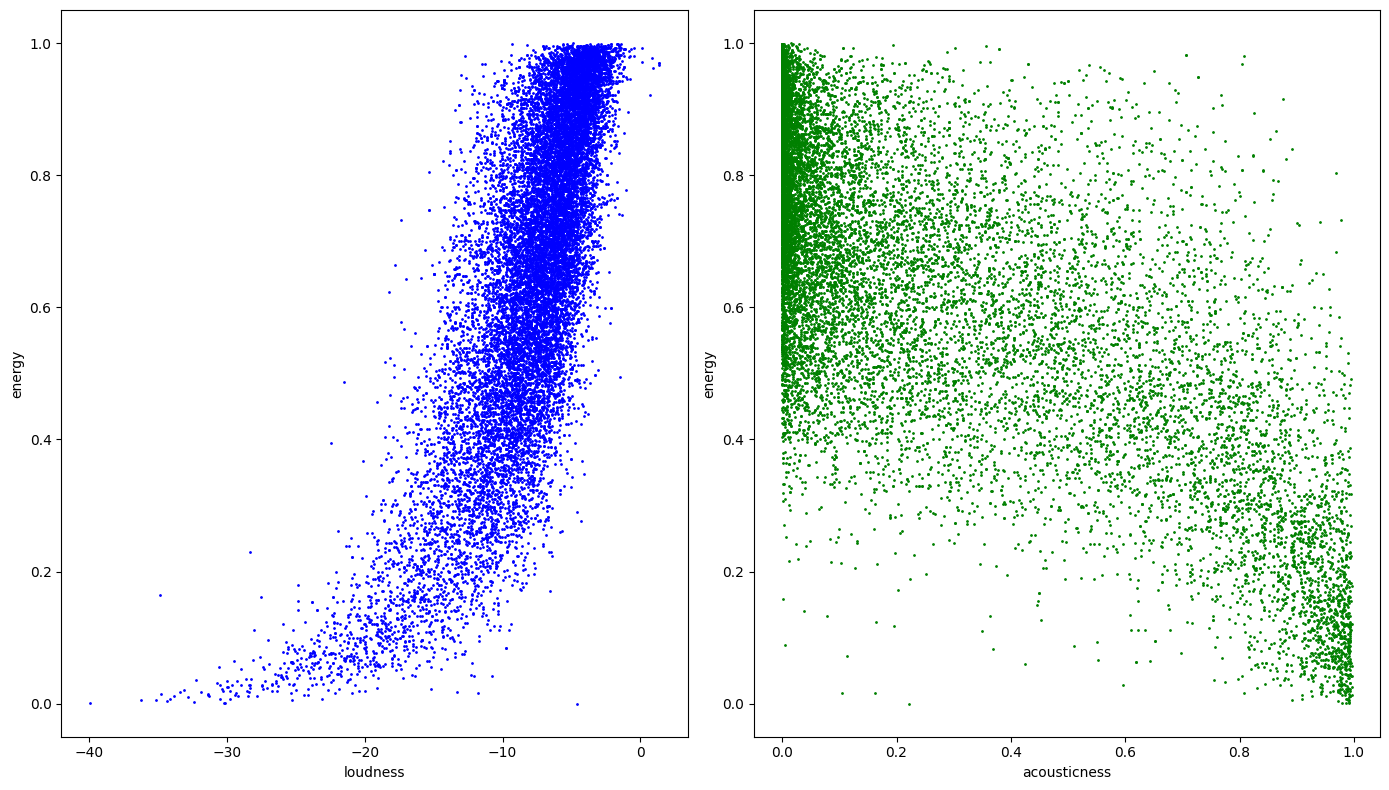

In [95]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(14, 8))

ax1.scatter(df_float['loudness'], df_float['energy'], s=1, color='blue', alpha=1)
ax2.scatter(df_float['acousticness'], df_float['energy'], s=1, color='green', alpha=1)
ax1.set_xlabel('loudness')
ax1.set_ylabel('energy')
ax2.set_xlabel('acousticness')
ax2.set_ylabel('energy')

plt.tight_layout()

 Podemos notar un patron de relacion entre loundness y energia en el primer grafico de manera ascendente. Por otra parte en cuanto a acousticness y energy tiende a descender pero con muchos outlider

Grafico Dispersion

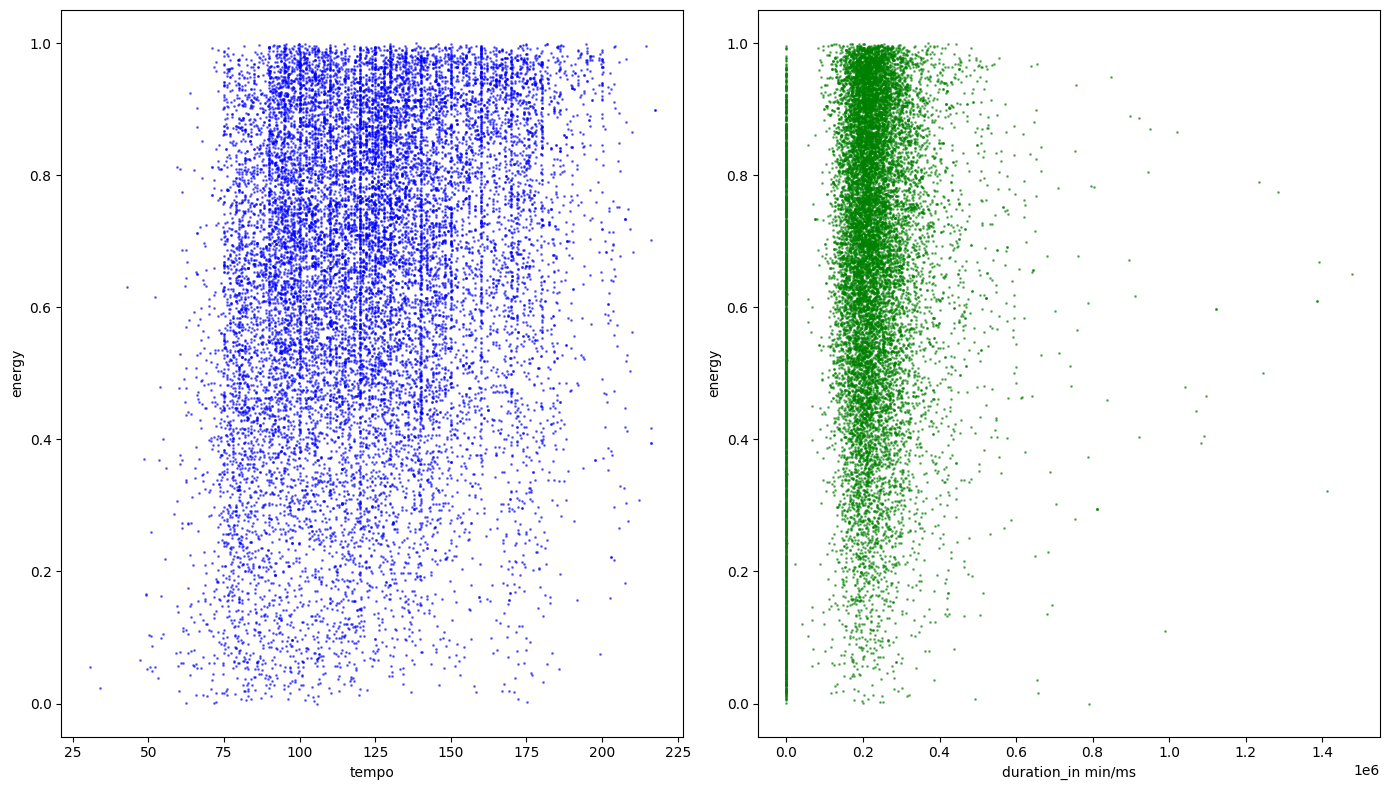

In [137]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(14, 8))

ax1.scatter(df_float['tempo'], df_float['energy'], s=1, color='blue', alpha=0.5)
ax2.scatter(df_float['duration_in min/ms'], df_float['energy'], s=1, color='green', alpha=0.5)
ax1.set_xlabel('tempo')
ax1.set_ylabel('energy')
ax2.set_xlabel('duration_in min/ms')
ax2.set_ylabel('energy')

plt.tight_layout()

En cuando a la relacion energia y duracion , notamos que hay una tendencia en la duracion de entre 0.2 a 0.4, y 0.6 en menor medida.Tempo y energia es variable, ya que la cuadratura de un cancion puede definir su tempo pero no su energia

In [13]:
df_1[['energy', 'Popularity', 'danceability','duration_in min/ms','tempo','acousticness','Class']].corr()

,energy,Popularity,danceability,duration_in min/ms,tempo,acousticness,Class
energy,1.000000,0.050873,-0.093838,0.245768,0.210224,-0.745963,0.217328
Popularity,0.050873,1.000000,0.165469,-0.029972,-0.005924,-0.123594,0.158493
danceability,-0.093838,0.165469,1.000000,-0.121624,-0.183527,0.009055,-0.097681
duration_in min/ms,0.245768,-0.029972,-0.121624,1.000000,0.045133,-0.322583,0.203678
tempo,0.210224,-0.005924,-0.183527,0.045133,1.000000,-0.168318,0.031737
acousticness,-0.745963,-0.123594,0.009055,-0.322583,-0.168318,1.000000,-0.237138
Class,0.217328,0.158493,-0.097681,0.203678,0.031737,-0.237138,1.000000


<Axes: >

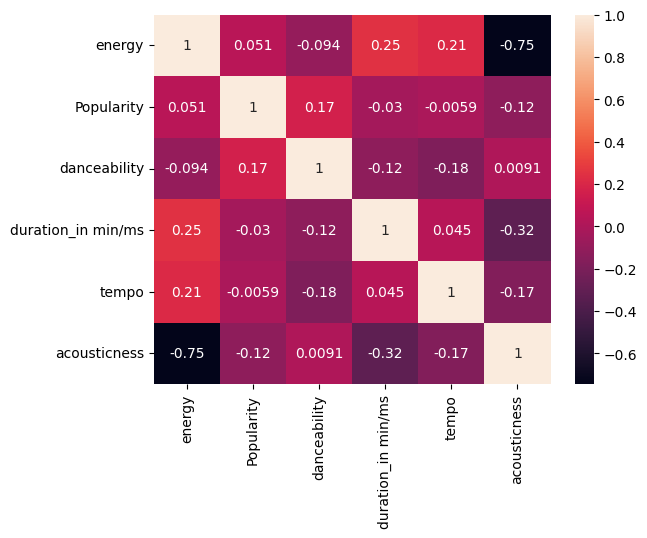

In [14]:
sns.heatmap(df_1[['energy', 'Popularity', 'danceability','duration_in min/ms','tempo','acousticness']].corr(), annot=True)

### Buscamos relacion entre nuestras variables selecionadas
Podemos notar que los canciones Acusticas tienden a ser menos energicas ,
Tambien la relacion entre la durecion y la energia
con respecto a la popularidad asi como el tempo son variables que no tiene relacion significativa

<Axes: >

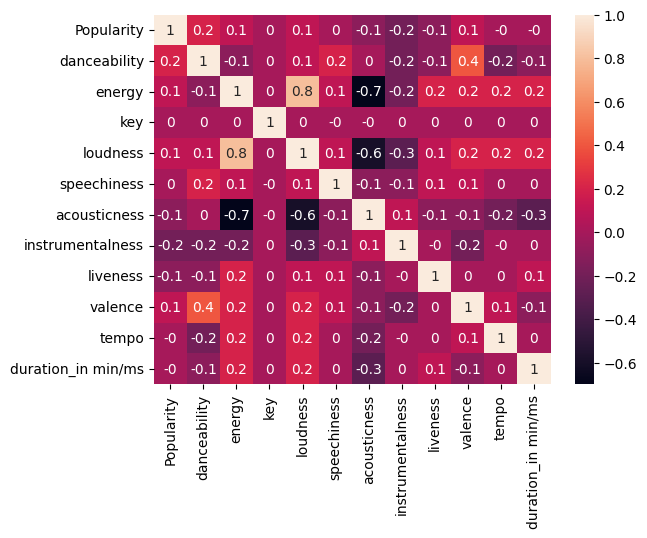

In [15]:
sns.heatmap(df_float.corr().round(1), annot=True)

###Grafico Popularidad por clase

Advertencia. en este punto se reemplaza el valor



In [16]:
df_submission = pd.read_csv(submission_url)
clase_columna= df_submission.columns.tolist()
Mapeo= {i:col.split('_')[0] for i, col in enumerate(clase_columna)}
df_1C['Class']= df_1C['Class'].map(Mapeo)
df_1C.head()

,Artist Name,Track Name,Popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_in min/ms,time_signature,Class
0,Bruno Mars,That's What I Like (feat. Gucci Mane),60.0,0.854,0.564,1.0,-4.964,1,0.0485,0.017100,0.003910,0.0849,0.8990,134.071,234596.0,4,HipHop
1,Boston,Hitch a Ride,54.0,0.382,0.814,3.0,-7.230,1,0.0406,0.001100,0.004010,0.1010,0.5690,116.454,251733.0,4,Rock
2,The Raincoats,No Side to Fall In,35.0,0.434,0.614,6.0,-8.334,1,0.0525,0.486000,0.000196,0.3940,0.7870,147.681,109667.0,4,Indie Alt
3,Deno,Lingo (feat. J.I & Chunkz),66.0,0.853,0.597,10.0,-6.528,0,0.0555,0.021200,0.003910,0.1220,0.5690,107.033,173968.0,4,HipHop
4,Red Hot Chili Peppers,Nobody Weird Like Me - Remastered,53.0,0.167,0.975,2.0,-4.279,1,0.2160,0.000169,0.016100,0.1720,0.0918,199.060,229960.0,4,Rock


<ipython-input-17-36fcbe379edb>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_1C, x='Class', y='Popularity', palette='muted')


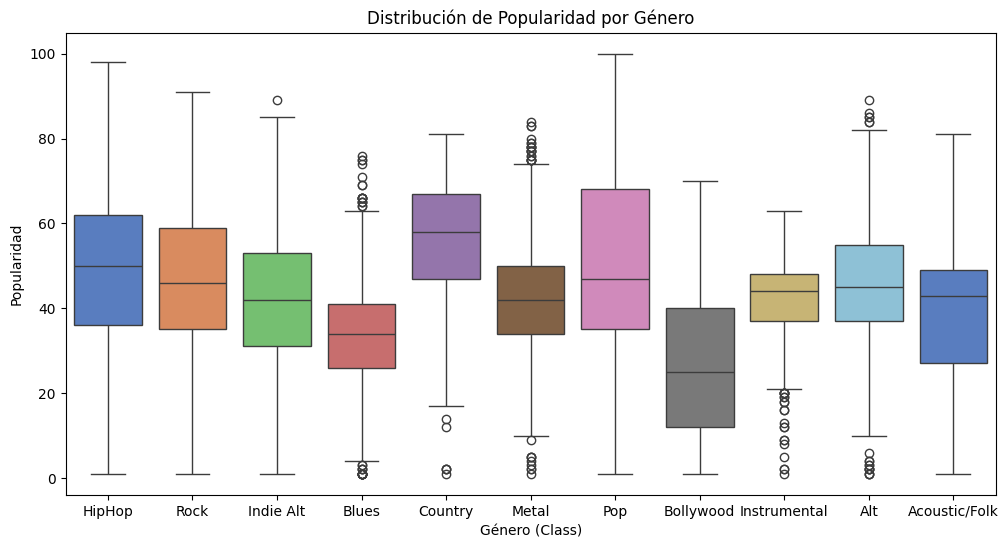

Porcentaje de Popularidad por Género:
Class
Acoustic/Folk     3.03
Alt               7.86
Blues             5.25
Bollywood         1.35
Country           2.74
HipHop            8.78
Indie Alt        13.41
Instrumental      2.99
Metal             9.78
Pop              15.82
Rock             28.99
Name: Popularity, dtype: float64


In [17]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_1C, x='Class', y='Popularity', palette='muted')
plt.title("Distribución de Popularidad por Género")
plt.xlabel("Género (Class)")
plt.ylabel("Popularidad")
plt.show()


total_popularity = df_1C['Popularity'].sum()
Porcentaje = (df_1C.groupby('Class')['Popularity'].sum() / total_popularity) * 100
print("Porcentaje de Popularidad por Género:")
print(Porcentaje.round(2))


Para cada clase notamos que cada paremetro esta determinado en escencia por el tipo de clase que tiene cada uno. Es decir la identificacion de paremetros similiares entre estilos

Grafico de Energia por clase

<ipython-input-18-f800bdd3c6cd>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_1C, x='Class', y='energy', palette='muted')


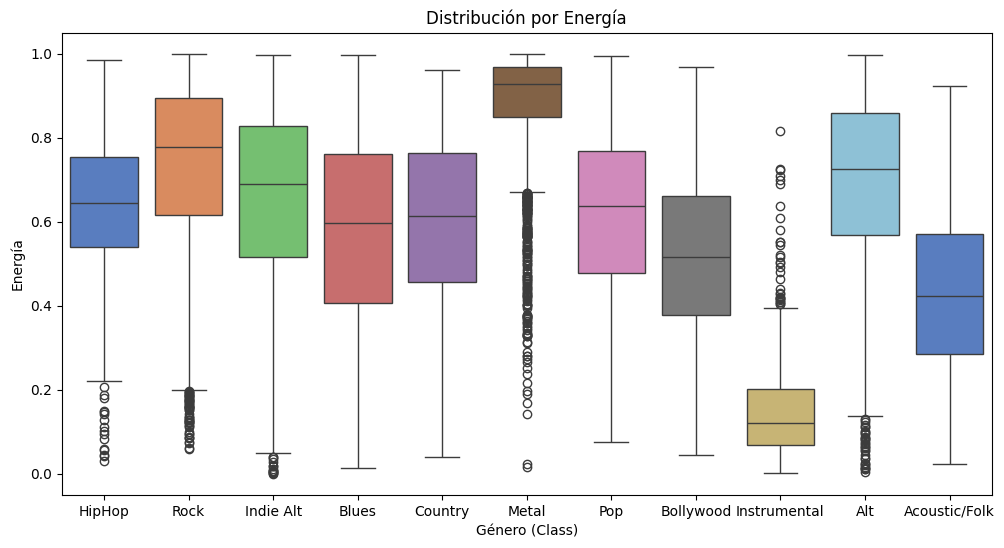

Porcentaje de Energía por Género:
Class
Acoustic/Folk     2.28
Alt               7.92
Blues             6.16
Bollywood         1.76
Country           1.95
HipHop            7.80
Indie Alt        14.18
Instrumental      0.75
Metal            13.61
Pop              13.10
Rock             30.49
Name: energy, dtype: float64


In [18]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_1C, x='Class', y='energy', palette='muted')
plt.title("Distribución por Energía")
plt.xlabel("Género (Class)")
plt.ylabel("Energía")
plt.show()

total_energy = df_1C['energy'].sum()
Porcentaje2 = (df_1C.groupby('Class')['energy'].sum() / total_energy) * 100
Porcentaje2 = Porcentaje2.round(2)

print("Porcentaje de Energía por Género:")
print(Porcentaje2)


En cuanto a energia ya si notamos paremetros propios del estilo, era de esperar que intrumental seria muy bajo y metal muy alto

## Entrenamiento de modelo regresion random forest

In [19]:
#modelo 1
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
#Determinamos que va colocamos en cada eje
X = df_1[['energy', 'tempo', 'acousticness']]
y = df_1['Popularity']

# Dividimos en conjuntos de entrenamiento y prueba cambie parametro por 100
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)

# Entrenamiento del modelo Random Forest
model_rf = RandomForestRegressor(n_estimators=100, random_state=100)
model_rf.fit(X_train, y_train)

# Predicciones
y_pred = model_rf.predict(X_test)

# Evaluación del modelo
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Evaluación del modelo:")
print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"R²: {r2}")


Evaluación del modelo:
MAE: 12.484581371252206
MSE: 266.5088592946295
R²: 0.10503315855792017


Visualizacion

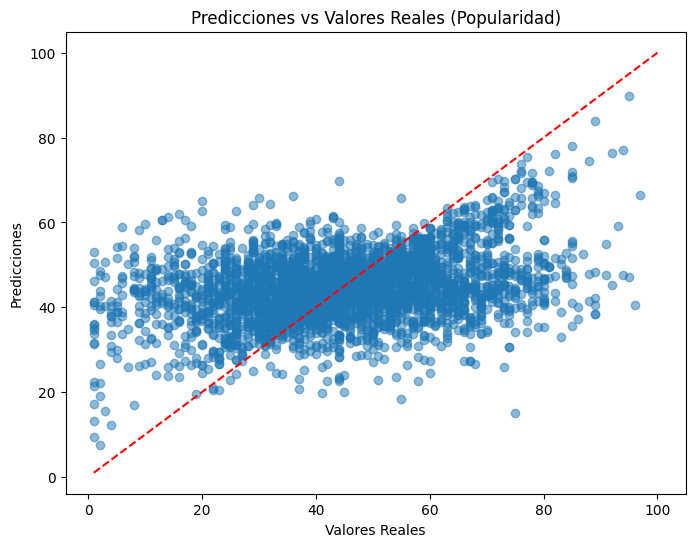

In [20]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y.min(), y.max()], [y.min(), y.max()], '--', color='red')
plt.title("Predicciones vs Valores Reales (Popularidad)")
plt.xlabel("Valores Reales")
plt.ylabel("Predicciones")
plt.show()

Repoduccion del modelo en grafico. Muetra una ligera tendencia, pero en primero instancia confirma que nuestra hipostesis.
Se probo en el modelo con mas y menos variables pero la prediccion siempre da numeros similiares.
Existen al momenos variables que no pueden ser contabilizadas,Por ejemplo la popularidad especifica de una banda, genera que pueda tener un alcance mayor que bandas locales, deribando en mas escucha y por ende tendencia a popularidad, que llamaremos populiridad colateral.
Desde inclusive la letra de la cancion para un lugar especifico en el tiempo. Como canciones de paz en tiempos de guerra, O canciones en epoca de juegos olimpicos, festividades popias, cantidad de poblacion , etc.

Advertencia al entreanar el siguinte modelo utilizamos la una la misma linea por lo que luego de eje

## Regrecion logistica

In [35]:
#Modelo 2
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split

#Filtramos a eleccion utilizamos las misma variables
selected_columns = ['energy', 'tempo', 'acousticness','Popularity']

features = selected_columns
target = 'Class'

# Dividir los datos en conjunto de entrenamiento y prueba
X = df_1C[features]
y = df_1C[target].astype('category')  # Si la variable objetivo es categórica

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Crear y entrenar el modelo de regresión logística
log_reg_model = LogisticRegression(max_iter=5000, random_state=42)
log_reg_model.fit(X_train, y_train)

# Hacer predicciones en el conjunto de prueba
y_pred = log_reg_model.predict(X_test)

# Evaluar el modelo
print("Exactitud del modelo:", accuracy_score(y_test, y_pred))
print("\nReporte de clasificación:\n", classification_report(y_test, y_pred))


Exactitud del modelo: 0.32598629375810334

Reporte de clasificación:
               precision    recall  f1-score   support

           0       0.12      0.00      0.01       208
           1       0.00      0.00      0.00       404
           2       0.23      0.10      0.14       405
           3       0.55      0.46      0.50       128
           4       0.00      0.00      0.00       105
           5       0.00      0.00      0.00       418
           6       0.17      0.06      0.08       758
           7       0.40      0.84      0.54       152
           8       0.50      0.37      0.43       564
           9       0.27      0.19      0.22       789
          10       0.32      0.77      0.45      1468

    accuracy                           0.33      5399
   macro avg       0.23      0.25      0.22      5399
weighted avg       0.25      0.33      0.25      5399



/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no pre

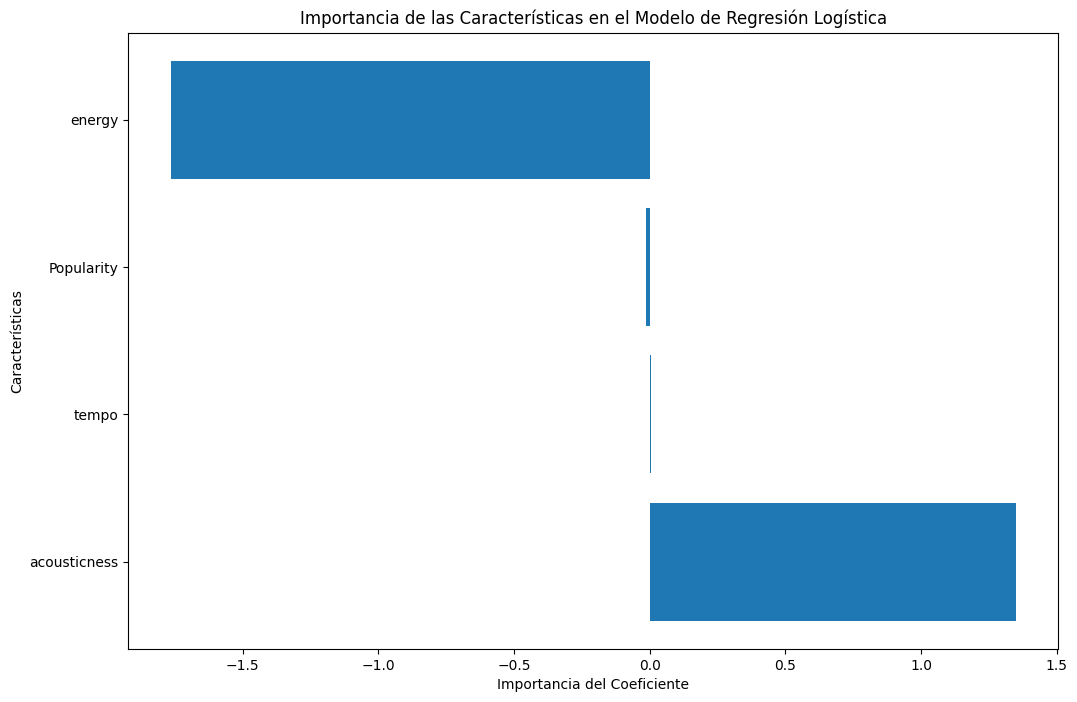

In [197]:
# Visualizacion del modelo
coef = log_reg_model.coef_[0]
feature_importance = pd.DataFrame({'Feature': features, 'Importance': coef})
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(12, 8))
plt.barh(feature_importance['Feature'], feature_importance['Importance'])
plt.xlabel('Importancia del Coeficiente')
plt.ylabel('Características')
plt.title('Importancia de las Características en el Modelo de Regresión Logística')
plt.show()


En el siguiente grafico,seguimos analizando las variables y probamos nuevas convinaciones.De una u otra manera siempre terminamos confirmando las hipotesis, si bien Exisiten variables que se puedan realacionar y que tengas relacion, las mismas no son lo suficientemente importantes o determinante de manera que el modelo tiende a fallar en la predicion.